In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df.head()

,idade,glicemia_em_jejum,hbA1c,ttgo,pas,pad,imc,atividade_fisica,alcool,tabagismo,historico_familiar_diabetes,historico_familiar_hipertensao,uso_de_medicamentos,sintomas_classicos_diabetes
0,41,175,12.8,212,113,120,19.8,nao,sim,sim,sim,nao,hipertensao,sim
1,36,88,10.2,266,96,89,28.3,sim,nao,sim,sim,nao,hipertensao,nao
2,71,187,11.6,256,126,94,26.0,nao,sim,sim,sim,sim,hipertensao,nao
3,66,182,7.4,99,101,81,25.7,sim,nao,sim,sim,nao,hipertensao,sim
4,80,163,7.0,241,170,60,20.4,nao,nao,sim,nao,sim,ambos,nao


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idade                           100 non-null    int64  
 1   glicemia_em_jejum               100 non-null    int64  
 2   hbA1c                           100 non-null    float64
 3   ttgo                            100 non-null    int64  
 4   pas                             100 non-null    int64  
 5   pad                             100 non-null    int64  
 6   imc                             100 non-null    float64
 7   atividade_fisica                100 non-null    object 
 8   alcool                          100 non-null    object 
 9   tabagismo                       100 non-null    object 
 10  historico_familiar_diabetes     100 non-null    object 
 11  historico_familiar_hipertensao  100 non-null    object 
 12  uso_de_medicamentos             100 n

In [ ]:
df[["atividade_fisica", "alcool", "tabagismo", "historico_familiar_diabetes", "historico_familiar_hipertensao", "sintomas_classicos_diabetes"]].head()
#Os valores de atividade fisica, alcool, tabagismo, historicos e sintomas classicos de diabetes sao de sim ou nao

,atividade_fisica,alcool,tabagismo,historico_familiar_diabetes,historico_familiar_hipertensao,sintomas_classicos_diabetes
0,0,1,1,1,0,1
1,1,0,1,1,0,0
2,0,1,1,1,1,0
3,1,0,1,1,0,1
4,0,0,1,0,1,0


In [33]:
df["uso_de_medicamentos"].value_counts()
#Contudo o uso de medicamentos nao eh

uso_de_medicamentos
1    29
2    28
3    27
0    16
Name: count, dtype: int64

In [21]:
#Por conta disso, vamos ter que limpar os dados para fazer que Scikit Learn entenda. Trocando os valores para numeros
#Vamos trocar os valores de 'sim' para 1 e 'nao' para 0

df.replace('sim', 1, inplace=True)
df.replace('nao', 0, inplace=True)

C:\Users\deyvi\AppData\Local\Temp\ipykernel_6908\1168043130.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('nao', 0, inplace=True)


In [32]:
#Agora temos q colocar os valores da coluna 'uso_de_medicamentos' para numeros. Colocando os valores respectivamente como:
#Ambos -> 1
#Hipertensao -> 2
#Diabetes -> 3
#Nenhum -> 0

df.replace("ambos", 1, inplace=True)
df.replace("hipertensao", 2, inplace=True)
df.replace("diabetes", 3, inplace=True)
df.replace("nenhum", 0, inplace=True)

C:\Users\deyvi\AppData\Local\Temp\ipykernel_6908\1108608045.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("nenhum", 0, inplace=True)


In [ ]:
#Temos os dados que indica as doenças, mas não temos os valores da porcentagem para avaliar os dados
#Iremos criar um função para calcular os riscos de cada doenças

In [ ]:
#Primeiro diabetes

def calcular_risco_diabetes(row):
  risco = 0

  if row['glicemia_em_jejum'] > 125:
    risco += 0.4
  if row['hbA1c'] > 6.5:
    risco += 0.3
  if row['ttgo'] > 180:
    risco += 0.2
  if row['imc'] > 30:
    risco += 0.1
  if row['sintomas_classicos_diabetes'] == 1:
    risco += 0.1
  if row['historico_familiar_diabetes'] == 0:
    risco += 0.15
  if row['atividade_fisica'] == 0:
    risco += 0.05
  if row['alcool'] == 1:
    risco += 0.05
  
  return min(risco, 1.0)


#Hipertensao agora

def calcular_risco_hipertensao(row):
  risco = 0

  if row['pas'] >= 140:
    risco += 0.4
  if row['pad'] > 90:
    risco += 0.3
  if row['imc'] > 30:
    risco += 0.1
  if row['tabagismo'] == 1:
    risco += 0.1
  if row['historico_familiar_hipertensao'] == 0:
    risco += 0.15
  if row['atividade_fisica'] == 0:
    risco += 0.05
  if row['alcool'] == 1:
    risco += 0.05

  return min(risco, 1.0)


df['risco_diabetes'] = df.apply(calcular_risco_diabetes, axis=1)
df['risco_hipertensao'] = df.apply(calcular_risco_hipertensao, axis=1)

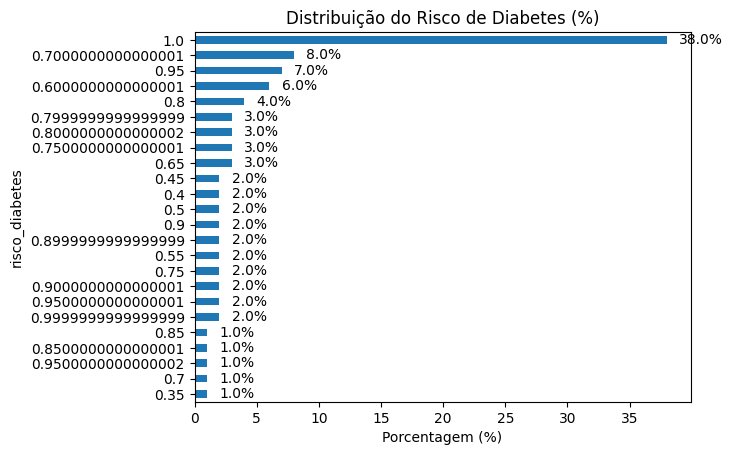

In [ ]:
# Calcula as porcentagens
percent_data = df['risco_diabetes'].value_counts(normalize=True) * 100

# Gráfico de barras
percent_data.sort_values().plot(kind='barh', color='#1f77b4')
plt.title('Distribuição do Risco de Diabetes (%)')
plt.xlabel('Porcentagem (%)')

# Adiciona os valores nas barras
for i, v in enumerate(percent_data.sort_values()):
    plt.text(v + 1, i, f"{v:.1f}%", va='center')

plt.show()

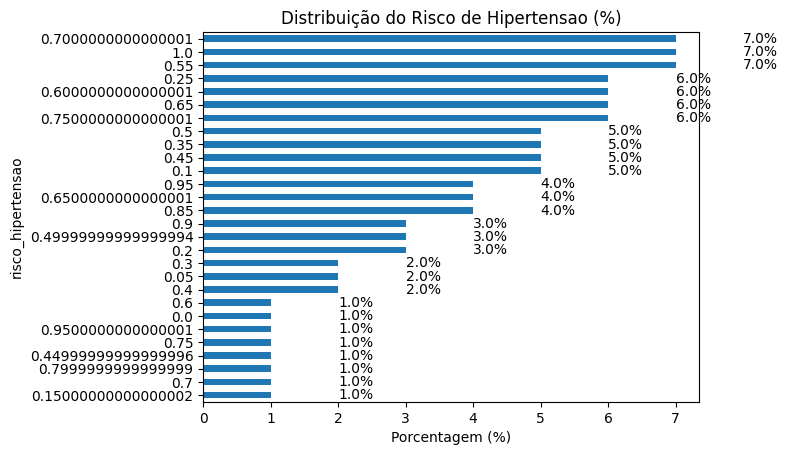

In [46]:
percent_data = df['risco_hipertensao'].value_counts(normalize=True) * 100

# Gráfico de barras
percent_data.sort_values().plot(kind='barh', color='#1f77b4')
plt.title('Distribuição do Risco de Hipertensao (%)')
plt.xlabel('Porcentagem (%)')

# Adiciona os valores nas barras
for i, v in enumerate(percent_data.sort_values()):
    plt.text(v + 1, i, f"{v:.1f}%", va='center')

plt.show()

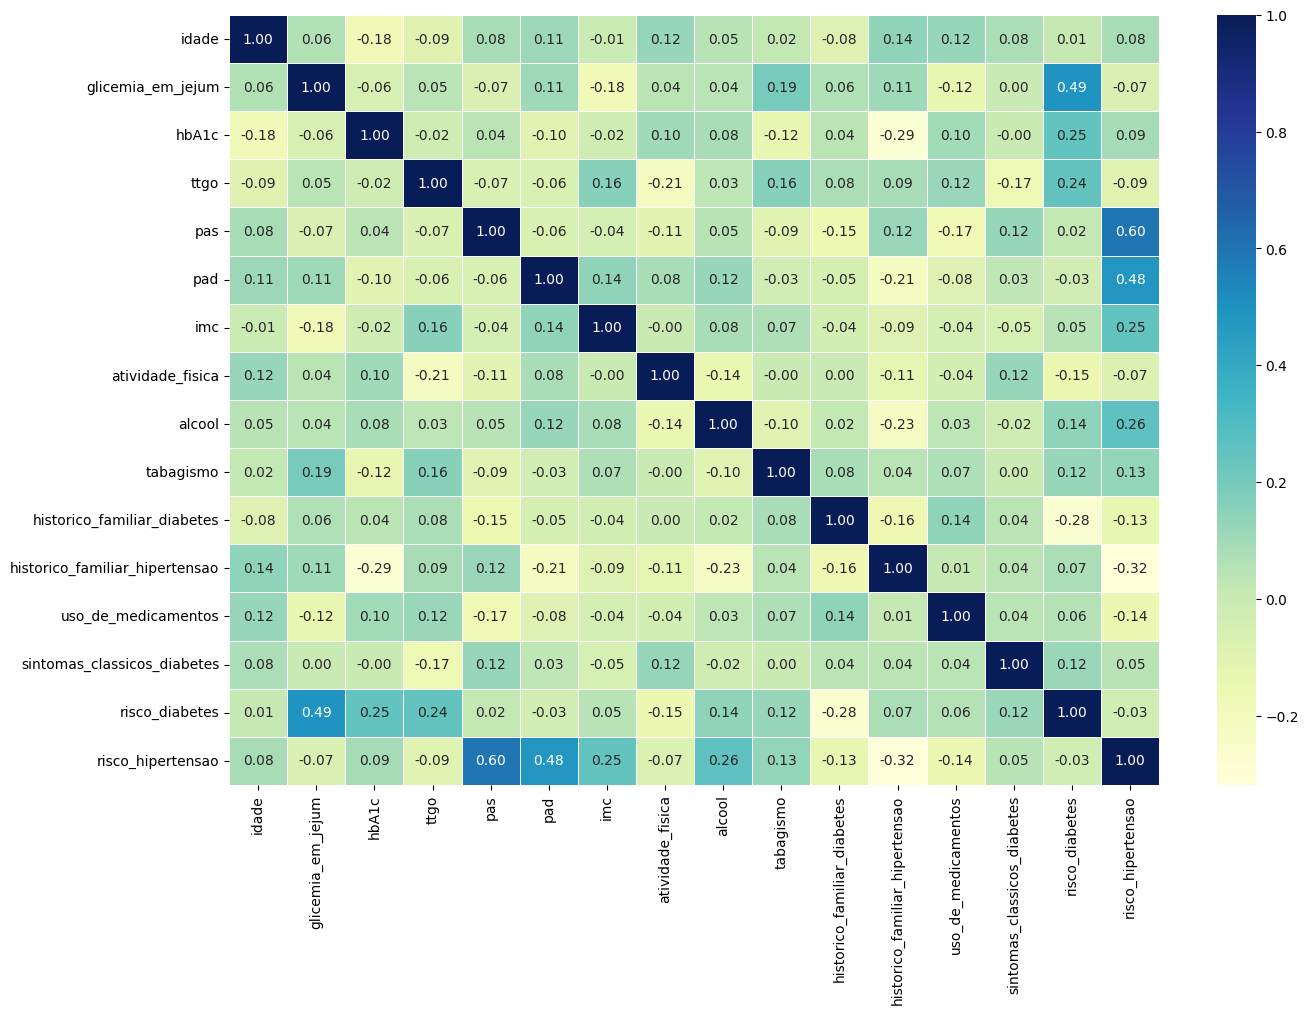

In [47]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");